# JSON Flattening and Transforms w/ Spotify Data

This notebooks shows how to do transforms with JSON data. Spotify has a wonderful API that allows access to a ton of their data. The Spotipy package offers a nice python interface to access that.


### First - Mount your drive and give access

The code below brings in some utilities and then provides the paths to the notebook and where to install.

In [ ]:
import os, sys
from google.colab import drive
drive.mount('/content/mnt')
nb_path = '/content/notebooks'
os.symlink('/content/mnt/My Drive/Colab Notebooks', nb_path)
sys.path.insert(0, nb_path)

### Install library

This is a regular install but you're telling it to install that into the notebook path in your drive created above.  

In [ ]:
!pip install --target=$nb_path spotipy

## Getting Spotipy up and running

Getting spotipy working is pretty easy!  Here's a step-by-step breakdown.

First, just go to the Spotify Developer webpage here: https://developer.spotify.com

1.   [Go to the Spotify Developer page](https://developer.spotify.com/dashboard/)
2.   Make an account
4.   In the Dashboard, Click 'CREATE AN APP' button in upper right
4.   Give it a name and description (the description doesn't matter)
5.   Click create
6.   On the new page it'll show your Client ID and a 'Show Client Secret' line of text
7.   Show the secret.   You'll need that and your ID for the next step.



###  Import spotipy and inputting credentials

In the cell below paste in your unique ID and secret and then run the cell.

In [ ]:
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials

spotify_client_id = '641c6cae41cd4899be91fb4cfd47d8b0'
spotify_client_secret  = 'd785431677a842059d9ccef1ceef6698'

client_credentials_manager = SpotifyClientCredentials(
    client_id=spotify_client_id,
    client_secret=spotify_client_secret
)

sp = spotipy.Spotify(
    client_credentials_manager=client_credentials_manager
)

## Working with a single artist

Let's dig in!  We're going to start with just getting info and making things work with just a single artist.  In this case we're going to get the top 10 songs and features by the artist Dance With The Dead.

![image](https://drive.google.com/uc?export=view&id=1SKmM94qeG0DSWZTaxQ13yQUUu3tGZ-_5)


### Getting artist info

First thing we're going to do is call the `artist()` function on our ID and see what that gets us!

In [ ]:
# libraries too :)
import pandas as pd
from pandas.io.json import json_normalize

# First, let's get an artist.  Note that you can also copy just the URI.
art = sp.artist('spotify:artist:2KtnZQwMQJN3uyI8eHZRvm')

In [ ]:
# Check it out
art

{'external_urls': {'spotify': 'https://open.spotify.com/artist/2KtnZQwMQJN3uyI8eHZRvm'},
 'followers': {'href': None, 'total': 227182},
 'genres': ['darksynth', 'nightrun', 'synthwave'],
 'href': 'https://api.spotify.com/v1/artists/2KtnZQwMQJN3uyI8eHZRvm',
 'id': '2KtnZQwMQJN3uyI8eHZRvm',
 'images': [{'height': 640,
   'url': 'https://i.scdn.co/image/ab6761610000e5eb71a456b24389957cbb378bf1',
   'width': 640},
  {'height': 320,
   'url': 'https://i.scdn.co/image/ab6761610000517471a456b24389957cbb378bf1',
   'width': 320},
  {'height': 160,
   'url': 'https://i.scdn.co/image/ab6761610000f17871a456b24389957cbb378bf1',
   'width': 160}],
 'name': 'Dance With the Dead',
 'popularity': 49,
 'type': 'artist',
 'uri': 'spotify:artist:2KtnZQwMQJN3uyI8eHZRvm'}

### Just a little JSON

Yep, so our object `art` is a JSON with a bunch of info about the band. A lot of that info is nested as well.  Let's work through it a bit.  

In [ ]:
# First, what keys are there?
art.keys()

In [ ]:
# Artist name
print(art['name'])

In [ ]:
# Can you get how many total followers there are?  It's two levels deep
print(art['followers']['total'])

In [ ]:
# Grab the genre of music
print(art['genres'][0])

### Mapping that JSON to a data frame

In [ ]:
# To start, you can store just a single element of that above JSON like anything else
artist_name = art['name']
artist_name

'Dance With the Dead'


We're going to make a function called 'get_artist_info'.  This function will take an artist ID and then store the name, id, followers, and genre, and then add them all into a list.  The return will be that list as it'll be easy to turn into a dataframe!


In [ ]:
def get_artist_info(art_id):
  art_json = sp.artist(art_id)
  artist_name = art_json['name']
  artist_id = art_json['id']
  followers = art_json['followers']['total']
  genre = art['genres'][0]
  art_list = [artist_name, artist_id, followers, genre]
  return(art_list)

In [ ]:
art_list = get_artist_info('2KtnZQwMQJN3uyI8eHZRvm')
art_list

['Dance With the Dead', '2KtnZQwMQJN3uyI8eHZRvm', 227182, 'darksynth']

In [ ]:
artist_info = pd.DataFrame(data = [art_list], columns = ['artist_name', 'artist_id', 'followers', 'genre'])
artist_info

,artist_name,artist_id,followers,genre
0,Dance With the Dead,2KtnZQwMQJN3uyI8eHZRvm,227182,darksynth


## Now to get the top tracks

Now that we have the artist info we can get their top 10 tracks.  The function `artist_top_tracks()` returns just that if you give it an ID

In [ ]:
# Assign top 10 songs to artist_top
artist_top = sp.artist_top_tracks(artist_info['artist_id'][0])
artist_top

{'tracks': [{'album': {'album_type': 'album',
    'artists': [{'external_urls': {'spotify': 'https://open.spotify.com/artist/27qG899eLldfpYtPr3S3NJ'},
      'href': 'https://api.spotify.com/v1/artists/27qG899eLldfpYtPr3S3NJ',
      'id': '27qG899eLldfpYtPr3S3NJ',
      'name': 'Scandroid',
      'type': 'artist',
      'uri': 'spotify:artist:27qG899eLldfpYtPr3S3NJ'}],
    'external_urls': {'spotify': 'https://open.spotify.com/album/7dK280hbKgErW9YigGFTE8'},
    'href': 'https://api.spotify.com/v1/albums/7dK280hbKgErW9YigGFTE8',
    'id': '7dK280hbKgErW9YigGFTE8',
    'images': [{'height': 640,
      'url': 'https://i.scdn.co/image/ab67616d0000b273d2d9f8620cc7bae62d97a873',
      'width': 640},
     {'height': 300,
      'url': 'https://i.scdn.co/image/ab67616d00001e02d2d9f8620cc7bae62d97a873',
      'width': 300},
     {'height': 64,
      'url': 'https://i.scdn.co/image/ab67616d00004851d2d9f8620cc7bae62d97a873',
      'width': 64}],
    'is_playable': True,
    'name': 'Dreams of Neo-

In [ ]:
# The topmost key is 'tracks' which makes sense as it's 10 indivdiual tracks
artist_top.keys()

In [ ]:
# Let's look at just the second track
artist_top['tracks'][1]

{'album': {'album_type': 'album',
  'artists': [{'external_urls': {'spotify': 'https://open.spotify.com/artist/2KtnZQwMQJN3uyI8eHZRvm'},
    'href': 'https://api.spotify.com/v1/artists/2KtnZQwMQJN3uyI8eHZRvm',
    'id': '2KtnZQwMQJN3uyI8eHZRvm',
    'name': 'Dance With the Dead',
    'type': 'artist',
    'uri': 'spotify:artist:2KtnZQwMQJN3uyI8eHZRvm'}],
  'external_urls': {'spotify': 'https://open.spotify.com/album/3kZ1FQTWCVrz37jwXWBjT5'},
  'href': 'https://api.spotify.com/v1/albums/3kZ1FQTWCVrz37jwXWBjT5',
  'id': '3kZ1FQTWCVrz37jwXWBjT5',
  'images': [{'height': 640,
    'url': 'https://i.scdn.co/image/ab67616d0000b27301e4a947ac10bd97afc345eb',
    'width': 640},
   {'height': 300,
    'url': 'https://i.scdn.co/image/ab67616d00001e0201e4a947ac10bd97afc345eb',
    'width': 300},
   {'height': 64,
    'url': 'https://i.scdn.co/image/ab67616d0000485101e4a947ac10bd97afc345eb',
    'width': 64}],
  'is_playable': True,
  'name': 'Driven to Madness',
  'release_date': '2022-01-10',
  'r

In [ ]:
pd.json_normalize(artist_top)

,tracks
0,"[{'album': {'album_type': 'album', 'artists': ..."


In [ ]:
# Let's call it on artist_top['tracks']
# Add .head(3) just to see only the first few.
pd.json_normalize(artist_top['tracks']).head(3)

,artists,disc_number,duration_ms,explicit,href,id,is_local,is_playable,name,popularity,...,album.images,album.is_playable,album.name,album.release_date,album.release_date_precision,album.total_tracks,album.type,album.uri,external_ids.isrc,external_urls.spotify
0,[{'external_urls': {'spotify': 'https://open.s...,1,352105,False,https://api.spotify.com/v1/tracks/44K1GCbNLf1N...,44K1GCbNLf1NHlCaLaYONk,False,True,Neo-Tokyo - Dance With The Dead Remix,51,...,"[{'height': 640, 'url': 'https://i.scdn.co/ima...",True,Dreams of Neo-Tokyo (Deluxe Edition),2017-03-31,day,20,album,spotify:album:7dK280hbKgErW9YigGFTE8,QM5LC1700030,https://open.spotify.com/track/44K1GCbNLf1NHlC...
1,[{'external_urls': {'spotify': 'https://open.s...,1,115728,False,https://api.spotify.com/v1/tracks/1yItTv2O2Ui8...,1yItTv2O2Ui8NmRPt3p7Pq,False,True,March of the Dead,50,...,"[{'height': 640, 'url': 'https://i.scdn.co/ima...",True,Driven to Madness,2022-01-10,day,10,album,spotify:album:3kZ1FQTWCVrz37jwXWBjT5,TCAFY2102387,https://open.spotify.com/track/1yItTv2O2Ui8NmR...
2,[{'external_urls': {'spotify': 'https://open.s...,1,259834,False,https://api.spotify.com/v1/tracks/68ngtC3pGiTj...,68ngtC3pGiTjXcFwxYCJ7Z,False,True,Diabolic,49,...,"[{'height': 640, 'url': 'https://i.scdn.co/ima...",True,The Shape,2016-02-06,day,10,album,spotify:album:6FrmsWgHEf8JGco0YPFOjJ,TCACL1692678,https://open.spotify.com/track/68ngtC3pGiTjXcF...


In [ ]:
artist_top['tracks'][1]['artists']

[{'external_urls': {'spotify': 'https://open.spotify.com/artist/2KtnZQwMQJN3uyI8eHZRvm'},
  'href': 'https://api.spotify.com/v1/artists/2KtnZQwMQJN3uyI8eHZRvm',
  'id': '2KtnZQwMQJN3uyI8eHZRvm',
  'name': 'Dance With the Dead',
  'type': 'artist',
  'uri': 'spotify:artist:2KtnZQwMQJN3uyI8eHZRvm'},
 {'external_urls': {'spotify': 'https://open.spotify.com/artist/0hxQtmgWiPtEsDPeIuKxXq'},
  'href': 'https://api.spotify.com/v1/artists/0hxQtmgWiPtEsDPeIuKxXq',
  'id': '0hxQtmgWiPtEsDPeIuKxXq',
  'name': 'John Carpenter',
  'type': 'artist',
  'uri': 'spotify:artist:0hxQtmgWiPtEsDPeIuKxXq'},
 {'external_urls': {'spotify': 'https://open.spotify.com/artist/5rJxl4BLLAaFRSNgAz2hSg'},
  'href': 'https://api.spotify.com/v1/artists/5rJxl4BLLAaFRSNgAz2hSg',
  'id': '5rJxl4BLLAaFRSNgAz2hSg',
  'name': 'Cody Carpenter',
  'type': 'artist',
  'uri': 'spotify:artist:5rJxl4BLLAaFRSNgAz2hSg'}]

In [ ]:
pd.json_normalize(artist_top['tracks'], record_path=['artists'], sep='_').head(5)

,href,id,name,type,uri,external_urls_spotify
0,https://api.spotify.com/v1/artists/27qG899eLld...,27qG899eLldfpYtPr3S3NJ,Scandroid,artist,spotify:artist:27qG899eLldfpYtPr3S3NJ,https://open.spotify.com/artist/27qG899eLldfpY...
1,https://api.spotify.com/v1/artists/2KtnZQwMQJN...,2KtnZQwMQJN3uyI8eHZRvm,Dance With the Dead,artist,spotify:artist:2KtnZQwMQJN3uyI8eHZRvm,https://open.spotify.com/artist/2KtnZQwMQJN3uy...
2,https://api.spotify.com/v1/artists/2KtnZQwMQJN...,2KtnZQwMQJN3uyI8eHZRvm,Dance With the Dead,artist,spotify:artist:2KtnZQwMQJN3uyI8eHZRvm,https://open.spotify.com/artist/2KtnZQwMQJN3uy...
3,https://api.spotify.com/v1/artists/0hxQtmgWiPt...,0hxQtmgWiPtEsDPeIuKxXq,John Carpenter,artist,spotify:artist:0hxQtmgWiPtEsDPeIuKxXq,https://open.spotify.com/artist/0hxQtmgWiPtEsD...
4,https://api.spotify.com/v1/artists/5rJxl4BLLAa...,5rJxl4BLLAaFRSNgAz2hSg,Cody Carpenter,artist,spotify:artist:5rJxl4BLLAaFRSNgAz2hSg,https://open.spotify.com/artist/5rJxl4BLLAaFRS...


In [ ]:
pd.json_normalize(artist_top['tracks'],
                  record_path=['artists'],
                  meta = ['id', 'name'])



Given our record is asking for artist info, let's give that a prefix of 'artist_' and our meta is asking for track info we'll give that 'track_'.

In [ ]:
pd.json_normalize(artist_top['tracks'],
  record_path=['artists'],
  meta = ['id', 'name'],
  record_prefix = 'artist_',
  meta_prefix = 'track_',
  sep = '_').head(3)

,artist_href,artist_id,artist_name,artist_type,artist_uri,artist_external_urls_spotify,track_id,track_name
0,https://api.spotify.com/v1/artists/27qG899eLld...,27qG899eLldfpYtPr3S3NJ,Scandroid,artist,spotify:artist:27qG899eLldfpYtPr3S3NJ,https://open.spotify.com/artist/27qG899eLldfpY...,44K1GCbNLf1NHlCaLaYONk,Neo-Tokyo - Dance With The Dead Remix
1,https://api.spotify.com/v1/artists/2KtnZQwMQJN...,2KtnZQwMQJN3uyI8eHZRvm,Dance With the Dead,artist,spotify:artist:2KtnZQwMQJN3uyI8eHZRvm,https://open.spotify.com/artist/2KtnZQwMQJN3uy...,44K1GCbNLf1NHlCaLaYONk,Neo-Tokyo - Dance With The Dead Remix
2,https://api.spotify.com/v1/artists/2KtnZQwMQJN...,2KtnZQwMQJN3uyI8eHZRvm,Dance With the Dead,artist,spotify:artist:2KtnZQwMQJN3uyI8eHZRvm,https://open.spotify.com/artist/2KtnZQwMQJN3uy...,1yItTv2O2Ui8NmRPt3p7Pq,March of the Dead


In [ ]:
# Lets store our data this time as top_track_info
top_track_info = pd.json_normalize(artist_top['tracks'],
                  record_path=['artists'],
                  meta = ['id', 'name'],
                  record_prefix = 'artist_',
                  meta_prefix = 'track_',
                  sep = '_')

top_track_info.head()

,artist_href,artist_id,artist_name,artist_type,artist_uri,artist_external_urls_spotify,track_id,track_name
0,https://api.spotify.com/v1/artists/27qG899eLld...,27qG899eLldfpYtPr3S3NJ,Scandroid,artist,spotify:artist:27qG899eLldfpYtPr3S3NJ,https://open.spotify.com/artist/27qG899eLldfpY...,44K1GCbNLf1NHlCaLaYONk,Neo-Tokyo - Dance With The Dead Remix
1,https://api.spotify.com/v1/artists/2KtnZQwMQJN...,2KtnZQwMQJN3uyI8eHZRvm,Dance With the Dead,artist,spotify:artist:2KtnZQwMQJN3uyI8eHZRvm,https://open.spotify.com/artist/2KtnZQwMQJN3uy...,44K1GCbNLf1NHlCaLaYONk,Neo-Tokyo - Dance With The Dead Remix
2,https://api.spotify.com/v1/artists/2KtnZQwMQJN...,2KtnZQwMQJN3uyI8eHZRvm,Dance With the Dead,artist,spotify:artist:2KtnZQwMQJN3uyI8eHZRvm,https://open.spotify.com/artist/2KtnZQwMQJN3uy...,1yItTv2O2Ui8NmRPt3p7Pq,March of the Dead
3,https://api.spotify.com/v1/artists/0hxQtmgWiPt...,0hxQtmgWiPtEsDPeIuKxXq,John Carpenter,artist,spotify:artist:0hxQtmgWiPtEsDPeIuKxXq,https://open.spotify.com/artist/0hxQtmgWiPtEsD...,1yItTv2O2Ui8NmRPt3p7Pq,March of the Dead
4,https://api.spotify.com/v1/artists/5rJxl4BLLAa...,5rJxl4BLLAaFRSNgAz2hSg,Cody Carpenter,artist,spotify:artist:5rJxl4BLLAaFRSNgAz2hSg,https://open.spotify.com/artist/5rJxl4BLLAaFRS...,1yItTv2O2Ui8NmRPt3p7Pq,March of the Dead


In [ ]:
# Let's keep just the columns we need.
# We're going to call for song specifics using track ID, but we'll also want artist ID and name for later.
top_track_info = top_track_info[['artist_name', 'artist_id', 'track_id', 'track_name']]
top_track_info.head()

,artist_name,artist_id,track_id,track_name
0,Scandroid,27qG899eLldfpYtPr3S3NJ,44K1GCbNLf1NHlCaLaYONk,Neo-Tokyo - Dance With The Dead Remix
1,Dance With the Dead,2KtnZQwMQJN3uyI8eHZRvm,44K1GCbNLf1NHlCaLaYONk,Neo-Tokyo - Dance With The Dead Remix
2,Dance With the Dead,2KtnZQwMQJN3uyI8eHZRvm,1yItTv2O2Ui8NmRPt3p7Pq,March of the Dead
3,John Carpenter,0hxQtmgWiPtEsDPeIuKxXq,1yItTv2O2Ui8NmRPt3p7Pq,March of the Dead
4,Cody Carpenter,5rJxl4BLLAaFRSNgAz2hSg,1yItTv2O2Ui8NmRPt3p7Pq,March of the Dead


Let's just filter our `top_track_info` dataframe to include only rows where the `artist_id` matches the `artist_name` in our `artist_info` data frame.

In [1]:
print('before: ' +  ', '.join(top_track_info['artist_name'].unique())) # before
top_track_info = top_track_info[top_track_info['artist_name'].isin(artist_info['artist_name'])]

print('after: ' +  ', '.join(top_track_info['artist_name'].unique())) # after

NameError: name 'top_track_info' is not defined

## Getting features of top tracks

In [ ]:
#get features of top tracks using audio_features
top_track_features = sp.audio_features(top_track_info['track_id'])
top_track_features = pd.json_normalize(top_track_features)
top_track_features = top_track_features.drop(columns = ['uri', 'track_href', 'analysis_url', 'type'])
top_track_features

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,id,duration_ms,time_signature
0,0.467,0.954,0,-4.137,0,0.0414,0.000016,0.908,0.0856,0.0610,122.004,44K1GCbNLf1NHlCaLaYONk,352105,4
1,0.610,0.869,7,-6.951,1,0.0318,0.000096,0.829,0.1150,0.0708,118.061,1yItTv2O2Ui8NmRPt3p7Pq,115728,4
2,0.639,0.948,4,-5.040,0,0.1810,0.000451,0.372,0.3890,0.3280,121.016,68ngtC3pGiTjXcFwxYCJ7Z,259835,4
3,0.501,0.875,3,-6.167,0,0.0345,0.000009,0.810,0.1940,0.2170,130.000,6lUyyCRoT2wvtGlQQEpk3U,286154,4
4,0.537,0.844,2,-6.884,1,0.0333,0.000076,0.930,0.0965,0.2120,108.997,4YPrCV5t9OykPyoI1xSxnR,221420,4
5,0.528,0.864,11,-5.702,0,0.0441,0.000332,0.869,0.0702,0.1590,126.012,69F2Y4CInUq7fgIsagg87r,274286,4
6,0.626,0.878,11,-4.951,1,0.2230,0.000014,0.103,0.0926,0.2310,130.028,5k3VFeS8Icp6OCc7qsW2ls,227077,4
7,0.622,0.890,7,-6.310,0,0.0316,0.000107,0.876,0.6490,0.5060,124.996,4QnTtQJnAxK61zOibTJpYT,270720,4
8,0.526,0.927,2,-4.909,1,0.0541,0.000061,0.831,0.4460,0.1760,93.004,2yrh2iC9s9wXbnc9fSCuIn,156129,4
9,0.400,0.901,5,-5.682,0,0.0468,0.000004,0.921,0.1550,0.4410,165.986,22xbCw0bxHECvCpk1UZxv9,205105,4


## Joining our data

In [ ]:
top_track_info = top_track_info.merge(top_track_features, left_on = 'track_id', right_on = 'id', how = 'left')
top_track_info

,artist_name,artist_id,track_id,track_name,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,id,duration_ms,time_signature
0,Dance With the Dead,2KtnZQwMQJN3uyI8eHZRvm,44K1GCbNLf1NHlCaLaYONk,Neo-Tokyo - Dance With The Dead Remix,0.467,0.954,0,-4.137,0,0.0414,0.000016,0.908,0.0856,0.0610,122.004,44K1GCbNLf1NHlCaLaYONk,352105,4
1,Dance With the Dead,2KtnZQwMQJN3uyI8eHZRvm,1yItTv2O2Ui8NmRPt3p7Pq,March of the Dead,0.610,0.869,7,-6.951,1,0.0318,0.000096,0.829,0.1150,0.0708,118.061,1yItTv2O2Ui8NmRPt3p7Pq,115728,4
2,Dance With the Dead,2KtnZQwMQJN3uyI8eHZRvm,68ngtC3pGiTjXcFwxYCJ7Z,Diabolic,0.639,0.948,4,-5.040,0,0.1810,0.000451,0.372,0.3890,0.3280,121.016,68ngtC3pGiTjXcFwxYCJ7Z,259835,4
3,Dance With the Dead,2KtnZQwMQJN3uyI8eHZRvm,6lUyyCRoT2wvtGlQQEpk3U,That House,0.501,0.875,3,-6.167,0,0.0345,0.000009,0.810,0.1940,0.2170,130.000,6lUyyCRoT2wvtGlQQEpk3U,286154,4
4,Dance With the Dead,2KtnZQwMQJN3uyI8eHZRvm,4YPrCV5t9OykPyoI1xSxnR,Hex,0.537,0.844,2,-6.884,1,0.0333,0.000076,0.930,0.0965,0.2120,108.997,4YPrCV5t9OykPyoI1xSxnR,221420,4
5,Dance With the Dead,2KtnZQwMQJN3uyI8eHZRvm,69F2Y4CInUq7fgIsagg87r,Invader,0.528,0.864,11,-5.702,0,0.0441,0.000332,0.869,0.0702,0.1590,126.012,69F2Y4CInUq7fgIsagg87r,274286,4
6,Dance With the Dead,2KtnZQwMQJN3uyI8eHZRvm,5k3VFeS8Icp6OCc7qsW2ls,Riot,0.626,0.878,11,-4.951,1,0.2230,0.000014,0.103,0.0926,0.2310,130.028,5k3VFeS8Icp6OCc7qsW2ls,227077,4
7,Dance With the Dead,2KtnZQwMQJN3uyI8eHZRvm,4QnTtQJnAxK61zOibTJpYT,Waves,0.622,0.890,7,-6.310,0,0.0316,0.000107,0.876,0.6490,0.5060,124.996,4QnTtQJnAxK61zOibTJpYT,270720,4
8,Dance With the Dead,2KtnZQwMQJN3uyI8eHZRvm,2yrh2iC9s9wXbnc9fSCuIn,Get Out,0.526,0.927,2,-4.909,1,0.0541,0.000061,0.831,0.4460,0.1760,93.004,2yrh2iC9s9wXbnc9fSCuIn,156129,4
9,Dance With the Dead,2KtnZQwMQJN3uyI8eHZRvm,22xbCw0bxHECvCpk1UZxv9,Sledge,0.400,0.901,5,-5.682,0,0.0468,0.000004,0.921,0.1550,0.4410,165.986,22xbCw0bxHECvCpk1UZxv9,205105,4


In [ ]:
# A reminder of what's in artist_info
artist_info

,artist_name,artist_id,followers,genre
0,Dance With the Dead,2KtnZQwMQJN3uyI8eHZRvm,227182,darksynth


In [ ]:
# Join artist info.  The key in this case is artist_id
top_track_info.merge(artist_info, left_on = 'artist_id', right_on= 'artist_id', how = 'left')

,artist_name_x,artist_id,track_id,track_name,danceability,energy,key,loudness,mode,speechiness,...,instrumentalness,liveness,valence,tempo,id,duration_ms,time_signature,artist_name_y,followers,genre
0,Dance With the Dead,2KtnZQwMQJN3uyI8eHZRvm,44K1GCbNLf1NHlCaLaYONk,Neo-Tokyo - Dance With The Dead Remix,0.467,0.954,0,-4.137,0,0.0414,...,0.908,0.0856,0.0610,122.004,44K1GCbNLf1NHlCaLaYONk,352105,4,Dance With the Dead,227182,darksynth
1,Dance With the Dead,2KtnZQwMQJN3uyI8eHZRvm,1yItTv2O2Ui8NmRPt3p7Pq,March of the Dead,0.610,0.869,7,-6.951,1,0.0318,...,0.829,0.1150,0.0708,118.061,1yItTv2O2Ui8NmRPt3p7Pq,115728,4,Dance With the Dead,227182,darksynth
2,Dance With the Dead,2KtnZQwMQJN3uyI8eHZRvm,68ngtC3pGiTjXcFwxYCJ7Z,Diabolic,0.639,0.948,4,-5.040,0,0.1810,...,0.372,0.3890,0.3280,121.016,68ngtC3pGiTjXcFwxYCJ7Z,259835,4,Dance With the Dead,227182,darksynth
3,Dance With the Dead,2KtnZQwMQJN3uyI8eHZRvm,6lUyyCRoT2wvtGlQQEpk3U,That House,0.501,0.875,3,-6.167,0,0.0345,...,0.810,0.1940,0.2170,130.000,6lUyyCRoT2wvtGlQQEpk3U,286154,4,Dance With the Dead,227182,darksynth
4,Dance With the Dead,2KtnZQwMQJN3uyI8eHZRvm,4YPrCV5t9OykPyoI1xSxnR,Hex,0.537,0.844,2,-6.884,1,0.0333,...,0.930,0.0965,0.2120,108.997,4YPrCV5t9OykPyoI1xSxnR,221420,4,Dance With the Dead,227182,darksynth
5,Dance With the Dead,2KtnZQwMQJN3uyI8eHZRvm,69F2Y4CInUq7fgIsagg87r,Invader,0.528,0.864,11,-5.702,0,0.0441,...,0.869,0.0702,0.1590,126.012,69F2Y4CInUq7fgIsagg87r,274286,4,Dance With the Dead,227182,darksynth
6,Dance With the Dead,2KtnZQwMQJN3uyI8eHZRvm,5k3VFeS8Icp6OCc7qsW2ls,Riot,0.626,0.878,11,-4.951,1,0.2230,...,0.103,0.0926,0.2310,130.028,5k3VFeS8Icp6OCc7qsW2ls,227077,4,Dance With the Dead,227182,darksynth
7,Dance With the Dead,2KtnZQwMQJN3uyI8eHZRvm,4QnTtQJnAxK61zOibTJpYT,Waves,0.622,0.890,7,-6.310,0,0.0316,...,0.876,0.6490,0.5060,124.996,4QnTtQJnAxK61zOibTJpYT,270720,4,Dance With the Dead,227182,darksynth
8,Dance With the Dead,2KtnZQwMQJN3uyI8eHZRvm,2yrh2iC9s9wXbnc9fSCuIn,Get Out,0.526,0.927,2,-4.909,1,0.0541,...,0.831,0.4460,0.1760,93.004,2yrh2iC9s9wXbnc9fSCuIn,156129,4,Dance With the Dead,227182,darksynth
9,Dance With the Dead,2KtnZQwMQJN3uyI8eHZRvm,22xbCw0bxHECvCpk1UZxv9,Sledge,0.400,0.901,5,-5.682,0,0.0468,...,0.921,0.1550,0.4410,165.986,22xbCw0bxHECvCpk1UZxv9,205105,4,Dance With the Dead,227182,darksynth


Great!

## Making this work with lots of artists

### Starting with a list of artists

Here's a list of the URIs for different artists.

In [ ]:
artist_list = ['1Mxqyy3pSjf8kZZL4QVxS0', '2KtnZQwMQJN3uyI8eHZRvm', '4UXqAaa6dQYAk18Lv7PEgX', '7yRimuQSC5Ks3T2Ts0iyZa', '5Ho1vKl1Uz8bJlk4vbmvmf', '7tYKF4w9nC0nq9CsPZTHyP',
               '4q3ewBCX7sLwd24euuV69X', '6ueGR6SWhUJfvEhqkvMsVs', '3pc0bOVB5whxmD50W79wwO', '5WY88tCMFA6J6vqSN3MmDZ', '3ZjoQ5yuRyPhZSIw5nCVBb', '5DIi2JWfQPTKffaVBlIYRn',
               '6qqNVTkY8uBg9cP3Jd7DAH', '2qxJFvFYMEDqd7ui6kSAcq', '2o5jDhtHVPhrJdv3cEQ99Z', '3EA9hVIzKfFiQI0Kikz2wo', '6nxWCVXbOlEVRexSbLsTer', '49gaZqfow2v8EEQmjGyEIw',
               '6LuN9FCkKOj5PcnpouEgny', '3TVXtAsR1Inumwj472S9r4', '711MCceyCBcFnzjGY4Q7Un', '4gzpq5DPGxSnKTe4SA8HAU', '7oPftvlwr6VrsViSDV7fJY', '3Uobr6LgQpBbk6k4QGAb3V',
               '4f9iBmdUOhQWeP7dcAn1pf', '0FI0kxP0BWurTz8cB8BBug', '2CIMQHirSU0MQqyYHq0eOx', '0ZMWrgLff357yxLyEU77a1', '1feoGrmmD8QmNqtK2Gdwy8', '2mVVjNmdjXZZDvhgQWiakk',
               '57vWImR43h4CaDao012Ofp', '1uiEZYehlNivdK3iQyAbye', '6l3HvQ5sa6mXTsMTB19rO5', '4O15NlyKLIASxsJ0PrXPfz', '7F9ZL4TJNr8AoU0UUQX8ih' ]


In [ ]:
def get_artist_info(art_id):
  art_json = sp.artist(art_id)
  artist_name = art_json['name']
  artist_id = art_json['id']
  followers = art_json['followers']['total']
  genre = art_json['genres'][0]
  art_list = [artist_name, artist_id, followers, genre]
  return(art_list)


In [ ]:
get_artist_info(artist_list[0])

['Frank Sinatra', '1Mxqyy3pSjf8kZZL4QVxS0', 6864282, 'adult standards']

### Using `map()`

In [ ]:
# Apply get_artist_info function to artist_list and store as artist_info
artist_info = map(get_artist_info, artist_list)
artist_info #check

So it appears to have worked, but it created a map object which isn't immediately useful.  We need to tell python that we want it as a list

In [ ]:
# Apply the list() function to our map object
artist_info = list(artist_info)
len(artist_info) # check

35

Great, now we have a bunch of lists each with artist info.  Now we can go and convert that into a dataframe like we did earlier in the lesson

In [ ]:
# Same syntax as before but this time I just told it to use different data!
artist_info = pd.DataFrame(data = artist_info, columns= ['artist_name', 'artist_id', 'followers', 'genre'])
artist_info

,artist_name,artist_id,followers,genre
0,Frank Sinatra,1Mxqyy3pSjf8kZZL4QVxS0,6864282,adult standards
1,Dance With the Dead,2KtnZQwMQJN3uyI8eHZRvm,227182,darksynth
2,Fall Out Boy,4UXqAaa6dQYAk18Lv7PEgX,10430543,emo
3,Patrick Topping,7yRimuQSC5Ks3T2Ts0iyZa,179085,house
4,Amelie Lens,5Ho1vKl1Uz8bJlk4vbmvmf,576174,acid techno
5,SZA,7tYKF4w9nC0nq9CsPZTHyP,17335703,pop
6,Bad Bunny,4q3ewBCX7sLwd24euuV69X,78695334,reggaeton
7,Janelle Monáe,6ueGR6SWhUJfvEhqkvMsVs,1434152,afrofuturism
8,keshi,3pc0bOVB5whxmD50W79wwO,3353497,chill r&b
9,NELL,5WY88tCMFA6J6vqSN3MmDZ,108874,k-rock


In [ ]:
# First, let's create an empty list for top tracks info
top_track_info = list()
top_track_info

[]

In [ ]:
for i in range(len(artist_info)):
  art_top = sp.artist_top_tracks(artist_info['artist_id'][i])
  top_tracks = pd.json_normalize(art_top['tracks'], record_path=['artists'], meta = ['id', 'name'], record_prefix = 'artist_', meta_prefix = 'track_', sep = '_')
  top_tracks = top_tracks[['artist_name', 'artist_id', 'track_id', 'track_name']]
  top_track_info.append(top_tracks)
top_track_info = pd.concat(top_track_info)

That seems to have worked.  Let's check the shape, head and tail of top_tracks_info which is the dataframe that we filled.

In [ ]:
top_track_info.head()

,artist_name,artist_id,track_id,track_name
0,Frank Sinatra,1Mxqyy3pSjf8kZZL4QVxS0,4feXcsElKIVsGwkbnTHAfV,Somethin' Stupid
1,Nancy Sinatra,3IZrrNonYELubLPJmqOci2,4feXcsElKIVsGwkbnTHAfV,Somethin' Stupid
2,Frank Sinatra,1Mxqyy3pSjf8kZZL4QVxS0,4kKdvXD0ez7jp1296JmAts,Let It Snow! Let It Snow! Let It Snow! (with T...
3,B. Swanson Quartet,0JXiS2FrAg3wQYJHcmZdrc,4kKdvXD0ez7jp1296JmAts,Let It Snow! Let It Snow! Let It Snow! (with T...
4,Frank Sinatra,1Mxqyy3pSjf8kZZL4QVxS0,4HEOgBHRCExyYVeTyrXsnL,Jingle Bells - Remastered 1999


In [ ]:
# Filter and check the length
top_track_info = top_track_info[top_track_info['artist_id'].isin(artist_info['artist_id'])]
top_track_info.shape

(357, 4)

In [ ]:
top_track_features = list()
for i in range(len(top_track_info)):
  top_track_feats = sp.audio_features(top_track_info['track_id'][i])
  top_track_feats = pd.json_normalize(top_track_feats)
  top_track_feats = top_track_feats.drop(columns = ['uri', 'track_href', 'analysis_url', 'type'])
  top_track_features.append(top_track_feats)
top_track_features = pd.concat(top_track_features)

In [ ]:
print(top_track_info.index)

# Now reset it.  Note that if you don't add drop = True it'll add the old index as a column
top_track_info = top_track_info.reset_index(drop=True)

print(top_track_info.index)

Int64Index([ 0,  2,  4,  5,  7,  8,  9, 10, 11, 12,
            ...
             0,  1,  2,  3,  4,  5,  6,  7,  8,  9],
           dtype='int64', length=357)
RangeIndex(start=0, stop=357, step=1)


In [ ]:
top_track_features = list()
for i in range(len(top_track_info)):
  top_track_feats = sp.audio_features(top_track_info['track_id'][i])
  top_track_feats = pd.json_normalize(top_track_feats)
  top_track_feats = top_track_feats.drop(columns = ['uri', 'track_href', 'analysis_url', 'type'])
  top_track_features.append(top_track_feats)
top_track_features = pd.concat(top_track_features)

In [ ]:
top_track_features.head()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,id,duration_ms,time_signature
0,0.257,0.338,4,-12.902,1,0.0357,0.736,0.0,0.2520,0.544,207.356,4feXcsElKIVsGwkbnTHAfV,162493,4
0,0.652,0.259,2,-13.336,1,0.0595,0.903,0.0,0.3620,0.836,142.169,4kKdvXD0ez7jp1296JmAts,155453,4
0,0.512,0.339,8,-13.119,1,0.0498,0.727,0.0,0.0977,0.951,174.609,4HEOgBHRCExyYVeTyrXsnL,120693,4
0,0.668,0.260,7,-14.256,1,0.0523,0.453,0.0,0.0621,0.368,119.416,5b7OgznPJJr1vHNYGyvxau,147000,4
0,0.401,0.381,2,-7.458,1,0.0274,0.700,0.0,0.1220,0.229,75.454,3spdoTYpuCpmq19tuD0bOe,276800,4


### Joining our data

Now let's join everything together just like before.  We'll do a left joint to attach the song features to our track info.  Then we'll do another to attach the artist info.

In [ ]:
# Do a left join to join our features to our top tracks
top_track_info = top_track_info.merge(top_track_features, left_on = 'track_id', right_on = 'id', how = 'left')
top_track_info


,artist_name,artist_id,track_id,track_name,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,id,duration_ms,time_signature
0,Frank Sinatra,1Mxqyy3pSjf8kZZL4QVxS0,4feXcsElKIVsGwkbnTHAfV,Somethin' Stupid,0.257,0.338,4,-12.902,1,0.0357,0.736000,0.000,0.2520,0.5440,207.356,4feXcsElKIVsGwkbnTHAfV,162493,4
1,Frank Sinatra,1Mxqyy3pSjf8kZZL4QVxS0,4kKdvXD0ez7jp1296JmAts,Let It Snow! Let It Snow! Let It Snow! (with T...,0.652,0.259,2,-13.336,1,0.0595,0.903000,0.000,0.3620,0.8360,142.169,4kKdvXD0ez7jp1296JmAts,155453,4
2,Frank Sinatra,1Mxqyy3pSjf8kZZL4QVxS0,4HEOgBHRCExyYVeTyrXsnL,Jingle Bells - Remastered 1999,0.512,0.339,8,-13.119,1,0.0498,0.727000,0.000,0.0977,0.9510,174.609,4HEOgBHRCExyYVeTyrXsnL,120693,4
3,Frank Sinatra,1Mxqyy3pSjf8kZZL4QVxS0,5b7OgznPJJr1vHNYGyvxau,Fly Me To The Moon (In Other Words),0.668,0.260,7,-14.256,1,0.0523,0.453000,0.000,0.0621,0.3680,119.416,5b7OgznPJJr1vHNYGyvxau,147000,4
4,Frank Sinatra,1Mxqyy3pSjf8kZZL4QVxS0,3spdoTYpuCpmq19tuD0bOe,My Way,0.401,0.381,2,-7.458,1,0.0274,0.700000,0.000,0.1220,0.2290,75.454,3spdoTYpuCpmq19tuD0bOe,276800,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,Archspire,7F9ZL4TJNr8AoU0UUQX8ih,0d3cbApujvuh5BukodWfbV,Drain of Incarnation,0.499,0.989,6,-3.146,0,0.2120,0.007940,0.826,0.0830,0.0806,160.024,0d3cbApujvuh5BukodWfbV,259747,4
391,Archspire,7F9ZL4TJNr8AoU0UUQX8ih,6zSoTY0gzjLX6mEpeDHwGE,Abandon the Linear,0.468,0.988,11,-3.311,1,0.1600,0.000939,0.807,0.3690,0.3230,145.018,6zSoTY0gzjLX6mEpeDHwGE,275653,4
392,Archspire,7F9ZL4TJNr8AoU0UUQX8ih,3lUp2Azjy1lAHN8QqaZWN8,A.U.M.,0.359,0.800,10,-4.248,0,0.2080,0.016100,0.564,0.1200,0.1960,200.165,3lUp2Azjy1lAHN8QqaZWN8,183933,4
393,Archspire,7F9ZL4TJNr8AoU0UUQX8ih,3tMf8o9PxjaK8PRdwD4NB9,Human Murmuration,0.332,0.977,1,-4.508,1,0.2600,0.000871,0.243,0.0700,0.2690,104.874,3tMf8o9PxjaK8PRdwD4NB9,252670,3


In [ ]:
# And another to join our artist info to our top_track_info data frame
# Join artist info.  The key in this case is the artist_id
top_track_info = top_track_info.merge(artist_info, left_on = 'artist_id', right_on= 'artist_id', how = 'left')

In [ ]:
# Check!
top_track_info

,artist_name_x,artist_id,track_id,track_name,danceability,energy,key,loudness,mode,speechiness,...,instrumentalness,liveness,valence,tempo,id,duration_ms,time_signature,artist_name_y,followers,genre
0,Frank Sinatra,1Mxqyy3pSjf8kZZL4QVxS0,4feXcsElKIVsGwkbnTHAfV,Somethin' Stupid,0.257,0.338,4,-12.902,1,0.0357,...,0.000,0.2520,0.5440,207.356,4feXcsElKIVsGwkbnTHAfV,162493,4,Frank Sinatra,6864282,adult standards
1,Frank Sinatra,1Mxqyy3pSjf8kZZL4QVxS0,4kKdvXD0ez7jp1296JmAts,Let It Snow! Let It Snow! Let It Snow! (with T...,0.652,0.259,2,-13.336,1,0.0595,...,0.000,0.3620,0.8360,142.169,4kKdvXD0ez7jp1296JmAts,155453,4,Frank Sinatra,6864282,adult standards
2,Frank Sinatra,1Mxqyy3pSjf8kZZL4QVxS0,4HEOgBHRCExyYVeTyrXsnL,Jingle Bells - Remastered 1999,0.512,0.339,8,-13.119,1,0.0498,...,0.000,0.0977,0.9510,174.609,4HEOgBHRCExyYVeTyrXsnL,120693,4,Frank Sinatra,6864282,adult standards
3,Frank Sinatra,1Mxqyy3pSjf8kZZL4QVxS0,5b7OgznPJJr1vHNYGyvxau,Fly Me To The Moon (In Other Words),0.668,0.260,7,-14.256,1,0.0523,...,0.000,0.0621,0.3680,119.416,5b7OgznPJJr1vHNYGyvxau,147000,4,Frank Sinatra,6864282,adult standards
4,Frank Sinatra,1Mxqyy3pSjf8kZZL4QVxS0,3spdoTYpuCpmq19tuD0bOe,My Way,0.401,0.381,2,-7.458,1,0.0274,...,0.000,0.1220,0.2290,75.454,3spdoTYpuCpmq19tuD0bOe,276800,4,Frank Sinatra,6864282,adult standards
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,Archspire,7F9ZL4TJNr8AoU0UUQX8ih,0d3cbApujvuh5BukodWfbV,Drain of Incarnation,0.499,0.989,6,-3.146,0,0.2120,...,0.826,0.0830,0.0806,160.024,0d3cbApujvuh5BukodWfbV,259747,4,Archspire,140797,brutal death metal
391,Archspire,7F9ZL4TJNr8AoU0UUQX8ih,6zSoTY0gzjLX6mEpeDHwGE,Abandon the Linear,0.468,0.988,11,-3.311,1,0.1600,...,0.807,0.3690,0.3230,145.018,6zSoTY0gzjLX6mEpeDHwGE,275653,4,Archspire,140797,brutal death metal
392,Archspire,7F9ZL4TJNr8AoU0UUQX8ih,3lUp2Azjy1lAHN8QqaZWN8,A.U.M.,0.359,0.800,10,-4.248,0,0.2080,...,0.564,0.1200,0.1960,200.165,3lUp2Azjy1lAHN8QqaZWN8,183933,4,Archspire,140797,brutal death metal
393,Archspire,7F9ZL4TJNr8AoU0UUQX8ih,3tMf8o9PxjaK8PRdwD4NB9,Human Murmuration,0.332,0.977,1,-4.508,1,0.2600,...,0.243,0.0700,0.2690,104.874,3tMf8o9PxjaK8PRdwD4NB9,252670,3,Archspire,140797,brutal death metal


## Plotting and Aggregating

We're going to use the visualization library `seaborn`.


First we'll make a quick scatterplot of all our songs.  We'll color the points by artist.  

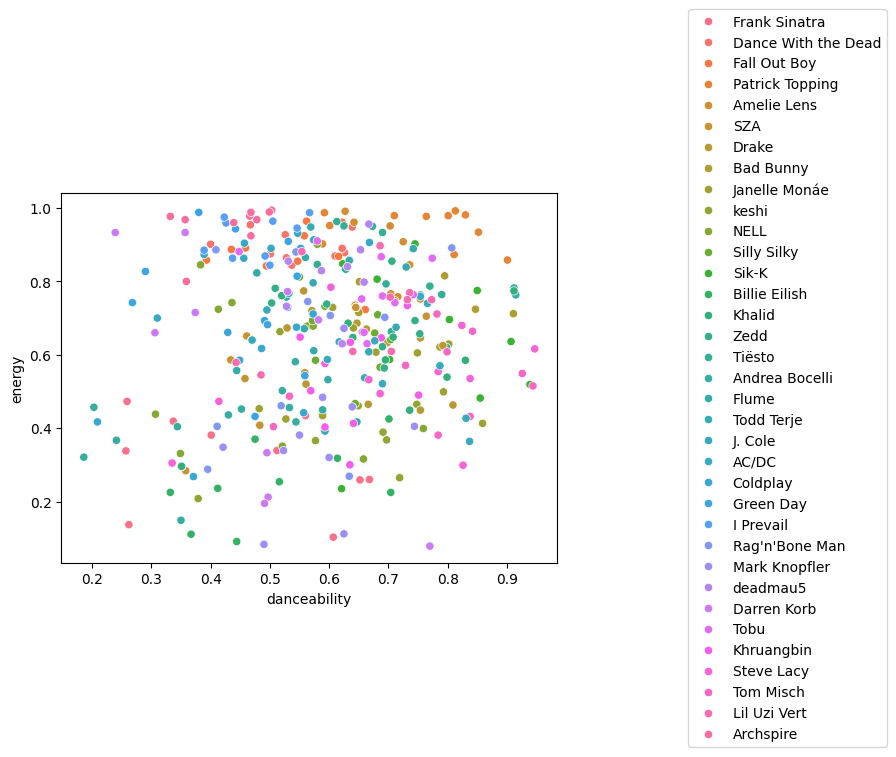

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plot = sns.scatterplot(data = top_track_info,
           x = 'danceability',
           y = 'energy',
           hue = 'artist_name_x')

plot.legend(loc='center left', bbox_to_anchor=(1.25, 0.5), ncol=1)
plt.show()

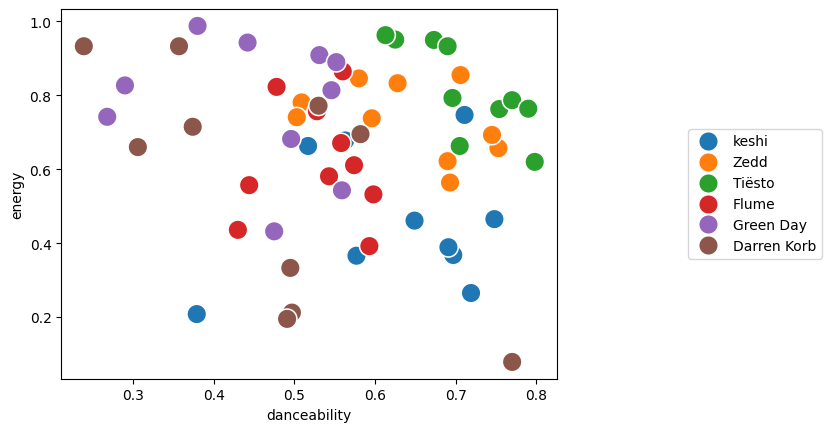

In [ ]:
plot = sns.scatterplot(data = top_track_info[top_track_info['artist_name_x'].isin(artist_info['artist_name'].sample(6))],
           x = 'danceability',
           y = 'energy',
           hue = 'artist_name_x',
           s = 200)

plot.legend(loc='center left', bbox_to_anchor=(1.25, 0.5), ncol=1)
plt.show()

## Rolling it up!


In [ ]:
songs_agg = top_track_info.groupby(['artist_name_x'], as_index = False).agg({'danceability': ['mean'],
                                                                        'energy': ['mean'],
                                                                        'loudness': ['mean'],
                                                                        'speechiness': ['mean'],
                                                                        'acousticness': ['mean'],
                                                                        'tempo': ['mean']})
songs_agg

,artist_name_x,danceability,energy,loudness,speechiness,acousticness,tempo
,,mean,mean,mean,mean,mean,mean
0,AC/DC,0.518900,0.850600,-4.723200,0.101890,0.058157,132.918100
1,Amelie Lens,0.683000,0.869300,-8.323100,0.049160,0.070036,137.801600
2,Andrea Bocelli,0.396300,0.397500,-7.616900,0.034310,0.790500,111.477400
3,Archspire,0.436900,0.954600,-3.591500,0.195400,0.003405,151.019600
4,Bad Bunny,0.752400,0.721600,-4.594100,0.151000,0.113980,110.721800
5,Billie Eilish,0.433706,0.271947,-11.667235,0.063776,0.868647,110.666824
6,Coldplay,0.472700,0.570400,-7.357100,0.030770,0.207006,126.111200
7,Dance With the Dead,0.545600,0.895000,-5.673300,0.072160,0.000116,124.010400
8,Darren Korb,0.464100,0.552650,-8.297700,0.040980,0.431026,121.607700


In [ ]:
# Rename like last time
songs_agg.columns = ['artist_name', 'mean_dance', 'mean_energy', 'mean_loud', 'mean_speech', 'mean_acoustic', 'mean_tempo']

In [ ]:
# Now join on our artist_info
artist_info.head(3)


,artist_name,artist_id,followers,genre
0,Frank Sinatra,1Mxqyy3pSjf8kZZL4QVxS0,6864282,adult standards
1,Dance With the Dead,2KtnZQwMQJN3uyI8eHZRvm,227182,darksynth
2,Fall Out Boy,4UXqAaa6dQYAk18Lv7PEgX,10430543,emo


In [ ]:
# Do our join
songs_agg = songs_agg.merge(artist_info, left_on='artist_name', right_on='artist_name', how = 'left')

In [ ]:
# Most danceable?
songs_agg[songs_agg['mean_dance'] == songs_agg['mean_dance'].max()]

,artist_name,mean_dance,mean_energy,mean_loud,mean_speech,mean_acoustic,mean_tempo,artist_id,followers,genre
25,Sik-K,0.7726,0.6486,-4.9392,0.12665,0.1746,143.9094,5DIi2JWfQPTKffaVBlIYRn,449743,k-rap


In [ ]:
# Most energy?
songs_agg[songs_agg['mean_energy'] == songs_agg['mean_energy'].max()]

,artist_name,mean_dance,mean_energy,mean_loud,mean_speech,mean_acoustic,mean_tempo,artist_id,followers,genre
3,Archspire,0.4369,0.9546,-3.5915,0.1954,0.003405,151.0196,7F9ZL4TJNr8AoU0UUQX8ih,140797,brutal death metal


In [ ]:
# Most acoustic?
songs_agg[songs_agg['mean_dance'] == songs_agg['mean_dance'].min()]

,artist_name,mean_dance,mean_energy,mean_loud,mean_speech,mean_acoustic,mean_tempo,artist_id,followers,genre
2,Andrea Bocelli,0.3963,0.3975,-7.6169,0.03431,0.7905,111.4774,3EA9hVIzKfFiQI0Kikz2wo,2619259,classical tenor


Let's make a scatterplot using this aggregated data!



In [ ]:
filled_markers = ('o', 'v', '^', '<', '>', '8', 's', 'p', '*', 'h', 'H', 'D', 'd', 'P', 'X', '.', ',')
len(filled_markers)

17

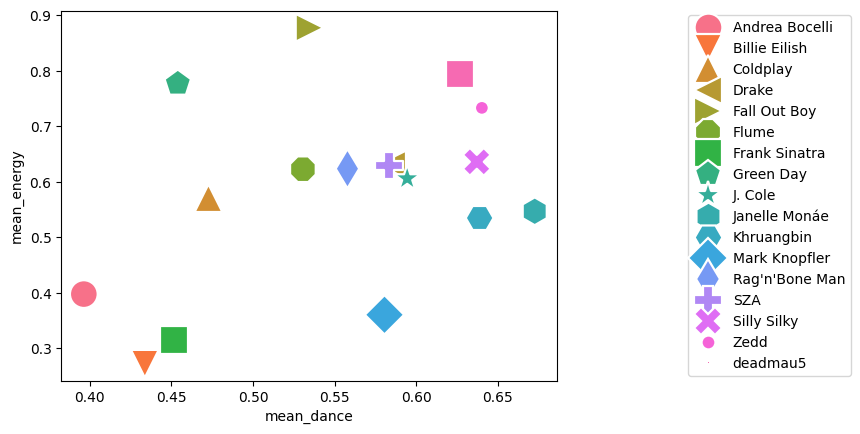

In [ ]:
plot = sns.scatterplot(data = songs_agg[songs_agg['artist_name'].isin(songs_agg['artist_name'].sample(len(filled_markers)))],
                       x = 'mean_dance',
                       y = 'mean_energy',
                       hue = 'artist_name',
                       style = 'artist_name',
                       markers=filled_markers,
                       s = 400)
plot.legend(loc='center left', bbox_to_anchor=(1.25, 0.5), ncol=1)
plt.show()